In [72]:
# !poetry run python -m vowpalwabbit -d train.dat --cb_explore 4 --bag 5
import vowpalwabbit

vw = vowpalwabbit.Workspace("--cb_explore 4 --cover 3", quiet=False)

[warning] currently, mtr is only used for the first policy in cover, other policies use dr


using no cache
Reading datafile = none
num sources = 0
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
cb_type = mtr
Enabled learners: gd, scorer-identity, csoaa_ldf-rank, cb_adf, cb_explore_adf_cover, shared_feature_merger, cb_to_cbadf
Input label = CB
Output pred = ACTION_PROBS
average  since         example        example        current        current  current
loss     last          counter         weight          label        predict features

finished run
number of examples = 198
weighted example sum = 198.000000
weighted label sum = 0.000000
average loss = 0.050505
total feature number = 3168


In [73]:
use_train = False
if use_train:
    with open("train.dat") as f:
        for line in f:
            line = line.strip()
            print(line)
            vw.learn(line)

In [74]:
def sample_custom_pmf(pmf):
    total = sum(pmf)
    scale = 1 / total
    pmf = [x * scale for x in pmf]
    draw = random.random()
    sum_prob = 0.0
    for index, prob in enumerate(pmf):
        sum_prob += prob
        if sum_prob > draw:
            return index, prob

In [75]:
def sample_custom_pmf2(pmf):
    action = np.argmax(pmf)
    return action, pmf[action]

In [76]:
import random

import numpy as np

while False:
    pmf = vw.predict("| a b c")
    action, probability = sample_custom_pmf(pmf)
    print("showing action:", action + 1)
    value = input("enter y, n or q:")
    if value == "q":
        break
    # Cost must be -tive for positive rewards.
    cost = -1 if value == "y" else 1
    # Action index starts from 1
    vw.learn(f"{action+1}:{cost}:{probability} | a b c")
    print(f"{action+1}:{cost}:{probability} | a b c")

In [77]:
import random
from collections import defaultdict

import numpy as np

cost_sum = 0.0
ctr = []
success = defaultdict(int)


for i in range(1, 100):
    pmf = vw.predict("| a b c")
    action, probability = sample_custom_pmf(pmf)
    # Cost must be -tive for positive rewards.
    # cost = -np.random.binomial(1, p=probability)
    cost = -np.random.binomial(1, p=0.6) if action == 0 else 1
    # Action index starts from 1
    success[action] += 1
    vw.learn(f"{action+1}:{cost}:{probability} | a b c")
    print(f"{action+1}:{cost}:{probability} | a b c")
    cost_sum += cost
    ctr.append(-cost_sum / i)

1:-1:0.25 | a b c
1:-1:0.25 | a b c
4:1:0.25 | a b c
3:1:0.25 | a b c
2:1:0.25 | a b c
3:1:0.22360678840855394 | a b c
1:-1:0.3876275958474339 | a b c
2:1:0.18898224830627441 | a b c
2:1:0.17677668963705465 | a b c
3:1:0.16666666915019349 | a b c
2:1:0.15811387958952963 | a b c
1:0:0.5477329655806114 | a b c
4:1:0.14433756900839714 | a b c
1:-1:0.5839748469587392 | a b c
1:-1:0.5991081745096911 | a b c
1:-1:0.6127016635641703 | a b c
1:0:0.625 | a b c
1:-1:0.6361965706514631 | a b c
4:1:0.1178511381149292 | a b c
1:0:0.6558764029732078 | a b c
1:-1:0.6645898323811715 | a b c
1:0:0.6726731953319969 | a b c
1:-1:0.6801989179879265 | a b c
1:0:0.6872284053966489 | a b c
1:-1:0.6938137956424519 | a b c
1:-1:0.7000000111758703 | a b c
4:1:0.09805806653158317 | a b c
1:-1:0.7113248824929896 | a b c
1:0:0.7165266275405884 | a b c
1:-1:0.7214569991718456 | a b c
2:1:0.09128709273468096 | a b c
3:1:0.08980265527375506 | a b c
1:0:0.7348349477637159 | a b c
1:-1:0.7388835063410327 | a b c
1:-1:0

n.a.     n.a.                1            1.0        unknown         0:0.25       16
-1.00000 -1.00000            2            2.0      0:-1:0.25         0:0.25       16
-1.00000 -1.00000            4            4.0      0:-1:0.25         0:0.25       16
0.000000 1.000000            8            8.0       2:1:0.25         0:0.25       16
0.250000 0.500000           16           16.0       1:1:0.19         0:0.43       16
0.187500 0.125000           32           32.0      0:-1:0.61         0:0.61       16
-0.00000 -0.18750           64           64.0       2:1:0.09         0:0.73       16
-0.17187 -0.34375          128          128.0      0:-1:0.81         0:0.81       16


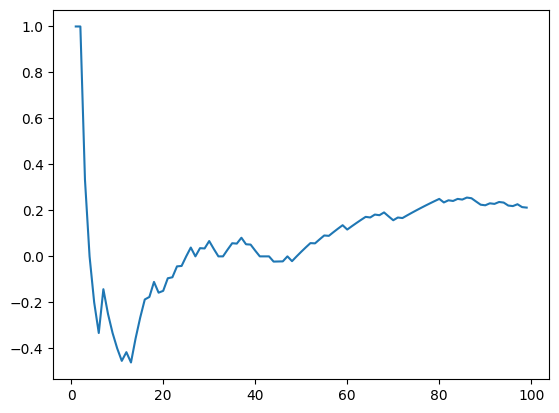

In [78]:
import matplotlib.pyplot as plt

plt.plot(range(1, 100), ctr)

In [79]:
success

defaultdict(int, {0: 73, 3: 12, 2: 8, 1: 6})

In [80]:
cost_sum

-21.0